Support Vector Regression is a popular machine learning technique for classification and regression. SVM is considered a non-parametric technique (data that does not fit into normal distribution) because it relies on kernel functions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [66]:
dataset = pd.read_csv('Position_Salaries.csv')

In [5]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [83]:
x = dataset.iloc[:,1].values #level 
y = dataset.iloc[:,2].values #salary

In [84]:
x1 = dataset.iloc[:,1]

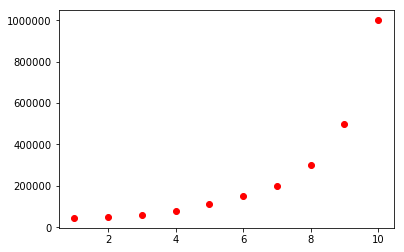

In [85]:
plt.scatter(x,y, color = 'red')

In [86]:
# from sklearn.cross_validation import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0) #choose 20, 25 or 30% of data for test data

In [87]:
x = np.array(x).reshape(len(x),1)
y = np.array(y).reshape(len(y),1)

In [88]:
#Feature Scaling (needs to be performed as SVR algorithm does not take care if it)
#If feature scaling is not performed, your model will not produce correct results
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [89]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

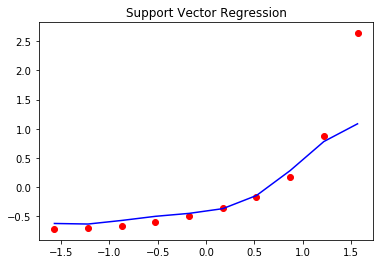

In [90]:
#Visualising linear regression results
plt.scatter(x,y, color = 'red')
plt.plot(x,regressor.predict(x), color = 'blue')
plt.title('Support Vector Regression')
plt.show()

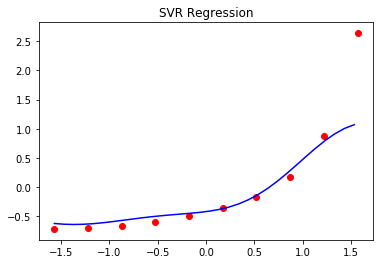

In [91]:
#Creating smoother curve for SVR  
x_grid = np.arange(min(x),max(x),0.1) #creating x variables in increment of 0.1 (instead of 1 previously)
x_grid = x_grid.reshape(len(x_grid),1) #need to reshape as predict model expects a matrix
plt.scatter(x,y,color = 'red') #plot original data points in the scatter plot
plt.plot(x_grid,regressor.predict(x_grid),color = 'blue') 
plt.title('SVR Regression')
plt.show()

In [92]:
regressor.predict(6.5) 
#this will give us incorrect value as 6.5 is not scaled

array([ 0.01158103])

In [96]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([6.5]).reshape(-1,1)))) 
#here we scale 6.5 using the StandardScaler object for x (we created above) and then invserse transform the 
#value of y predicted by our SVR model
print y_pred

[ 170370.0204065]
